In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
#Reading the training and testing data
df1 = pd.read_csv('training.csv')
df2 = pd.read_csv('test.csv')

In [59]:
df1.head()

,article_number,article_words,topic
0,1,"open,absent,cent,cent,cent,stock,inflow,rate,k...",5
1,2,"morn,stead,end,end,day,day,day,patch,patch,pat...",7
2,3,"socc,socc,world,world,recent,law,fifa,fifa,fif...",10
3,4,"open,forint,forint,forint,forint,cent,cent,ste...",5
4,5,"morn,complet,weekend,minut,minut,minut,arrow,d...",0


In [4]:
df2.head()

,article_number,article_words,topic
0,9501,"world,complet,pharmaceut,tianjin,tianjin,chin,...",IRRELEVANT
1,9502,"copy,sunday,weekend,ec,friday,eu,includ,limit,...",IRRELEVANT
2,9503,"heavy,heavy,gabriel,morn,morn,equit,cent,cent,...",FOREX MARKETS
3,9504,"research,jess,hit,anticip,comput,comput,comput...",IRRELEVANT
4,9505,"provid,provid,luxembourg,court,court,case,opin...",IRRELEVANT


In [5]:
#One Hot Encoding to quantitatively represent the topics
encoding = {'topic' : {'IRRELEVANT' : 0, 'ARTS' : 1, 'BIOGRAPHIES' : 2, 'DEFENCE' : 3, 'DOMESTIC MARKETS' : 4, 'FOREX MARKETS' : 5, 'HEALTH' : 6, 'MONEY MARKETS' : 7,'SCIENCE AND TECHNOLOGY' : 8, 'SHARE LISTINGS' : 9, 'SPORTS' :10,'BIOGRAPHIES PERSONALITIES PEOPLE':2,'ARTS CULTURE ENTERTAINMENT':1}}
encoding

{'topic': {'IRRELEVANT': 0,
  'ARTS': 1,
  'BIOGRAPHIES': 2,
  'DEFENCE': 3,
  'DOMESTIC MARKETS': 4,
  'FOREX MARKETS': 5,
  'HEALTH': 6,
  'MONEY MARKETS': 7,
  'SCIENCE AND TECHNOLOGY': 8,
  'SHARE LISTINGS': 9,
  'SPORTS': 10,
  'BIOGRAPHIES PERSONALITIES PEOPLE': 2,
  'ARTS CULTURE ENTERTAINMENT': 1}}

In [6]:
#Replacing topics with the relevant numbers for training data
df1 = df1.replace(encoding)
df1.head()

,article_number,article_words,topic
0,1,"open,absent,cent,cent,cent,stock,inflow,rate,k...",5
1,2,"morn,stead,end,end,day,day,day,patch,patch,pat...",7
2,3,"socc,socc,world,world,recent,law,fifa,fifa,fif...",10
3,4,"open,forint,forint,forint,forint,cent,cent,ste...",5
4,5,"morn,complet,weekend,minut,minut,minut,arrow,d...",0


In [7]:
#Replacing topics with the relevant numbers for testing data
df2 = df2.replace(encoding)
df2.head()

,article_number,article_words,topic
0,9501,"world,complet,pharmaceut,tianjin,tianjin,chin,...",0
1,9502,"copy,sunday,weekend,ec,friday,eu,includ,limit,...",0
2,9503,"heavy,heavy,gabriel,morn,morn,equit,cent,cent,...",5
3,9504,"research,jess,hit,anticip,comput,comput,comput...",0
4,9505,"provid,provid,luxembourg,court,court,case,opin...",0


In [8]:
data = pd.concat([df1['article_words'],df2['article_words']])

In [9]:
# Create bag of words
count = TfidfVectorizer()
bag_of_words = count.fit(data)

In [10]:
#Training and Testing split - X and Y
x_train = df1['article_words']
y_train = df1['topic'].to_list()
x_test = df2['article_words']
y_test = df2['topic'].to_list()

In [11]:
#Transforming the testing and training
x_train = bag_of_words.transform(x_train)
x_test = bag_of_words.transform(x_test)

In [12]:
#Define the clasifier and fit the data
from sklearn.svm import LinearSVC
classifier = LinearSVC(dual=False,random_state=0, tol=1e-5)
model = classifier.fit(x_train,y_train)

In [13]:
#Predicting the data
y_predict = model.predict(x_test)

In [14]:
train_accuracy_score = accuracy_score(y_train,model.predict(x_train))
test_accuracy_score = accuracy_score(y_test,model.predict(x_test))
print(f'Accuracy Score for training data : {train_accuracy_score}.\n')
print(f'Accuracy Score for testing data : {test_accuracy_score}.\n')

Accuracy Score for training data : 0.9501052631578948.

Accuracy Score for testing data : 0.772.



In [15]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       266
           1       0.33      0.67      0.44         3
           2       1.00      0.20      0.33        15
           3       0.90      0.69      0.78        13
           4       0.67      1.00      0.80         2
           5       0.44      0.33      0.38        48
           6       0.69      0.64      0.67        14
           7       0.55      0.64      0.59        69
           8       0.00      0.00      0.00         3
           9       0.50      0.43      0.46         7
          10       0.95      0.97      0.96        60

    accuracy                           0.77       500
   macro avg       0.63      0.59      0.57       500
weighted avg       0.77      0.77      0.76       500



In [23]:
temp = pd.DataFrame({'Predicted': y_predict})

In [28]:
temp

,Predicted
0,0
1,0
2,7
3,0
4,0
...,...
495,0
496,10
497,7
498,0


In [29]:
result = df2.copy()

In [32]:
result['Predicted'] = temp['Predicted']

In [33]:
result

,article_number,article_words,topic,Predicted
0,9501,"world,complet,pharmaceut,tianjin,tianjin,chin,...",0,0
1,9502,"copy,sunday,weekend,ec,friday,eu,includ,limit,...",0,0
2,9503,"heavy,heavy,gabriel,morn,morn,equit,cent,cent,...",5,7
3,9504,"research,jess,hit,anticip,comput,comput,comput...",0,0
4,9505,"provid,provid,luxembourg,court,court,case,opin...",0,0
...,...,...,...,...
495,9996,"symantec,soon,interfac,provid,provid,comput,co...",0,0
496,9997,"hit,hit,hit,hit,hit,hit,hit,hit,hit,beat,beat,...",10,10
497,9998,"cent,cent,cent,cent,match,declin,act,rate,rate...",7,7
498,9999,"cnmv,cnmv,stock,count,count,week,group,friday,...",9,0


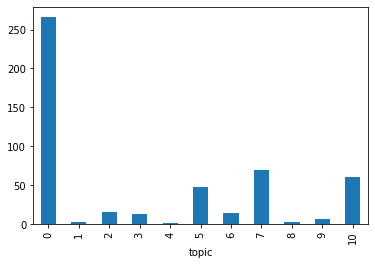

In [42]:
groups = result.groupby(['topic']).size()
groups.plot.bar()

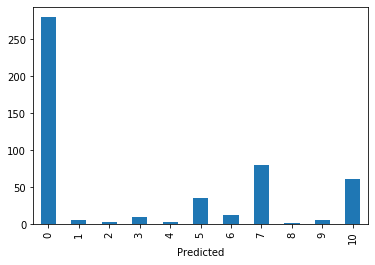

In [67]:
groups = result.groupby(['Predicted']).size()
groups.plot.bar()

In [43]:
train_result = pd.DataFrame({'predicted': y_train})

In [61]:
train_set = df1.copy()

In [62]:
train_set['predicted'] = train_result['predicted']

In [63]:
train_set

,article_number,article_words,topic,predicted
0,1,"open,absent,cent,cent,cent,stock,inflow,rate,k...",5,5
1,2,"morn,stead,end,end,day,day,day,patch,patch,pat...",7,7
2,3,"socc,socc,world,world,recent,law,fifa,fifa,fif...",10,10
3,4,"open,forint,forint,forint,forint,cent,cent,ste...",5,5
4,5,"morn,complet,weekend,minut,minut,minut,arrow,d...",0,0
...,...,...,...,...
9495,9496,"cloud,provid,hope,centur,erupt,rule,recent,sou...",3,3
9496,9497,"stock,stock,stock,declin,access,week,worry,blo...",0,0
9497,9498,"rate,million,million,belarus,dollar,dollar,nov...",5,5
9498,9499,"flow,bullet,bullet,bullet,bullet,bullet,bullet...",0,0


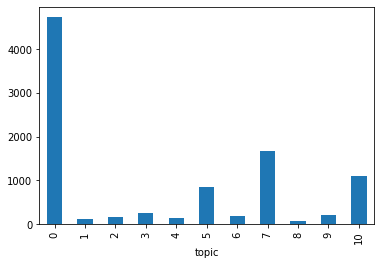

In [64]:
groups = train_set.groupby(['topic']).size()
groups.plot.bar()

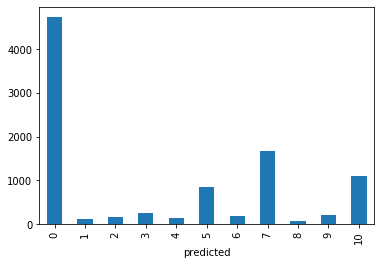

In [66]:
groups = train_set.groupby(['predicted']).size()
groups.plot.bar()

In [93]:
arts = result.query('topic==1')
biographies = result.query('topic==2')
defense = result.query('topic==3')
domestic = result.query('topic==4')
forex = result.query('topic==5')
health = result.query('topic==6')
money = result.query('topic==7')
science = result.query('topic==8')
share = result.query('topic==9')
sports = result.query('topic==10')

In [94]:
print(f'The number of articles in each category.')
print(f'Arts : {len(arts)}.')
print(f'Biographies : {len(biographies)}.')
print(f'Defense : {len(defense)}.')
print(f'Domestic : {len(domestic)}.')
print(f'Forex : {len(forex)}.')
print(f'Health : {len(health)}.')
print(f'Money : {len(money)}.')
print(f'Science : {len(science)}.')
print(f'Share : {len(share)}.')
print(f'Sports : {len(sports)}.')

The number of artciles in each category.
Arts : 3.
Biographies : 15.
Defense : 13.
Domestic : 2.
Forex : 48.
Health : 14.
Money : 69.
Science : 3.
Share : 7.
Sports : 60.


In [115]:
arts_pc = precision_score(arts['topic'],arts['Predicted'])
arts_recall = recall_score(arts['topic'],arts['Predicted'])
arts_f1 = f1_score(arts['topic'],arts['Predicted'])

In [114]:
arts

,article_number,article_words,topic,Predicted
202,9703,"accid,contin,cast,scor,act,act,act,fall,worry,...",1,1
333,9834,"relat,relat,relat,world,world,shakespear,shake...",1,0
451,9952,"mad,sunday,won,sery,emmy,emmy,comed,comed,star...",1,1


In [109]:
bio_pc = precision_score(biographies['topic'],biographies['Predicted'],labels=[0,1],average='micro')

In [110]:
bio_pc

0.0